# Statistical Rethinking

### Bayesian modeling:

### Chapter 2

To Consider:
1. The number of ways each conjecture could produce an observation (likelihood)
2. The accumulated number of ways each conjecture could produce the entire data (one or more parameters)
3. The intial plausbility of each conjectured cause of the data (prior)

**Likelihood** - mathematical formula that specifies the plausibility of the data. the likelihood maps each conjecture onto the relative number of ways the data could occur, given that possibility. Tells you the probability of any possible observation, for any possible state of the world. (can be represented by something like binomial distribution)

In [1]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# prob of getting 6 heads in 9 tosses
ss.binom.pmf(6, 9, 0.5)

0.16406250000000006

Pr(w | n, p)

**Likelihood**: tells us the relative number of ways to see the data *w*, given values for *p* (probability) and *n* (tosses)

**Parameters**: adjustable inputs *p* (probability of seeing a W), *n* (the sample size), *w* the number of Ws. 

In our example, *n* and *w* are known parameters, while p is unknown. We use Bayesian models to tell us about the unknown *p*.

**Prior**: for every parameters we want our Bayesian machine to estimate, we must provide it a *prior*. The prior is the initial plausability for each possible value of the parameter. Can use *regularizing or weakly informative priors*. They are used to constrain the parameters to reasonable ranges. If you don't have a strong argument for any particular prior, try different ones.

**Posterior**: Once you have chosen a likelihood, which parameters to be estimated, and a prior for each estimate, the Bayesian model can calculate the posterior. 

For every unique combination of data, likelihood, parameters, and prior, there is a unique st of estimates. The resulting estimates -- the relative plausibility of different parameter values, condtional on the data, -- are known as the **posterior distribution.**

Likelihood is constant, priors and posterior vary.

#### Conditioning the Prior

**Bayesian model**: has built-in definitions for likelihood, the parameters and prior. Then a motor processes data to produce the posterior distribution. This can be thought of as *conditioning* the prior.

1. **Grid Approximation**: approximate the continunous posterior distribution by considering only a finite grid of parameter values. for each value in the grid, multiply the prior probability of p by the likelihood at p.
2. **Quadratic Approximation**
3. **Markov chain Monte Carlo (MCMC)**

#### Grid Approximation
1. Definite the grid
2. Compute the value of the prior at each parameter
3. Compute the likelihood at each parameter value
4. compute the unstandardized posterior at each parameter value, by multiplying the prior by the likelihood

One problem is that it scales very poorly.

In [3]:
# define the grid
p_grid = np.linspace(0, 1, 20)
p_grid

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [4]:
# # define the prior
prior = [1] * 20
# prior

In [5]:
# # compute the likelihood at each value in grid
likelihoods = ss.binom.pmf(6, 9, p=p_grid)
# likelihoods

In [6]:
# # compute product
unstd_posterior = likelihoods * prior
# unstd_posterior

In [7]:
posterior = unstd_posterior / sum(unstd_posterior)

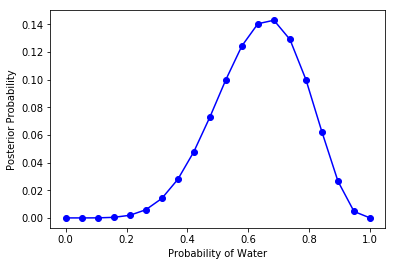

In [8]:
plt.plot(p_grid, posterior, color='b', marker='o' )
plt.xlabel('Probability of Water')
plt.ylabel('Posterior Probability');

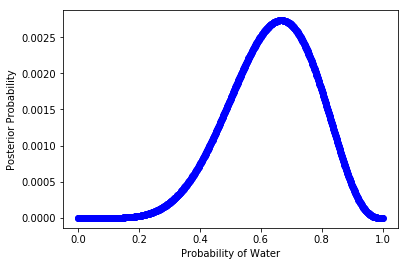

In [9]:
p_grid1 = np.linspace(0, 1, 1000)
prior1 = [1] * 1000
likelihoods1 = ss.binom.pmf(6, 9, p=p_grid1)
unstd_posterior1 = likelihoods1 * prior1
posterior1 = unstd_posterior1 / sum(unstd_posterior1)

plt.plot(p_grid1, posterior1, color='b', marker='o')
plt.xlabel('Probability of Water')
plt.ylabel('Posterior Probability');

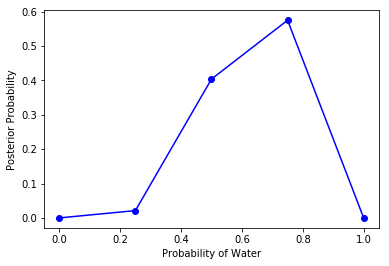

In [10]:
p_grid2 = np.linspace(0, 1, 5)
prior2 = [1] * 5
likelihoods2 = ss.binom.pmf(6, 9, p=p_grid2)
unstd_posterior2 = likelihoods2 * prior2
posterior2 = unstd_posterior2 / sum(unstd_posterior2)

plt.plot(p_grid2, posterior2, color='b', marker='o')
plt.xlabel('Probability of Water')
plt.ylabel('Posterior Probability');

changing the priors...

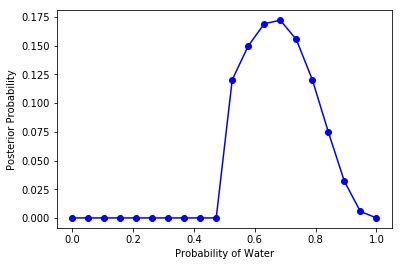

In [11]:
p_grid = np.array(p_grid)
prior3 = np.where(p_grid < 0.5, 0, 1)

likelihoods3 = ss.binom.pmf(6, 9, p=p_grid)
unstd_posterior3 = likelihoods3 * prior3
posterior3= unstd_posterior3 / sum(unstd_posterior3)

plt.plot(p_grid, posterior3, color='b', marker='o')
plt.xlabel('Probability of Water')
plt.ylabel('Posterior Probability');

### Quadratic Approximation

The region near the peak of a posterior will appear Gaussian. So you can use a Gaussian distribution to approximate the posterior. A Gaussian distribution is convenient because it can be completely described by onyl two number, location (mean) and spread (variance).

The log of a Gaussian disribbution forms a parabola and a prabola is a quadratic function. (parabolas have no derivative beyond the second(

1. Find the posterior mode
2. Once you find the peak, estimate the curvature near the peak. 



MAP (Maximum A Posteriori) needs a *formula*, *list of data* and *start values for paramters*. returns mean + stdev which are the peak of the distribution

Improves with more data. Using quadratic approximations always imrpove with more data which is why procedures using it are scared of small sample sizes.

#### Markov chain Monte Carlo

for some models, like multi-level (mixed-effects) models, neither grid approximation nor quadratic approximation is satisfactory. MCMC works by drawing samples from the posterior and using that information to calculate the posterior.

## Chapter 2 HW

Compute and plot grid approximate posterior distribution for each of the following set of observations
1. W W W
2. W W W L
3. L W W L W W W

# Chapter 3: Sampling the Imaginary

The sample approach is useful for two reasons. 
1. Working with samples transforms a problem in calculus into a problem in data summary. Therefore it is often easier and more intuitive to work with samples from the posterior, versus working with probabilities and integrals directly.
2. MCMC uses samples anyways


### 3.1 Sampling from grid-approximate posterior

R Code
> p_grid <- seq( from=0, to=1, length.out=1000)

> prior <- rep(1, 1000)

> likelihood <-dbinom(6, size=9, prob=p_grid)

> posterior <- likelihood * prior

> posterior <- posterior / sum(posterior)

> samples <- sample(p_grid, prob=posterior, size=1000, replace=TRUE)

In [12]:
p_grid = np.linspace(0, 1, 1000)
prior = [1] * 1000
likelihoods = ss.binom.pmf(6, 9, p=p_grid)
#compute product of likelihood and prior
unstd_posterior = likelihoods * prior
#standardize the posterior so it sums to 1
posterior = unstd_posterior / sum(unstd_posterior) 

In [13]:
# import pymc3 as pm

In [14]:
sample = np.random.choice(p_grid, size=10000, replace=True, 
                p=posterior)

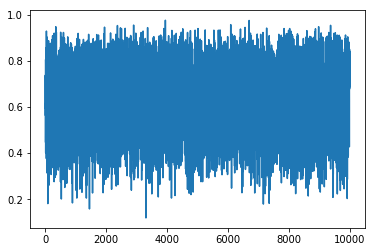

In [15]:
plt.plot(sample);

R code for density estimate:

> plot(samples)

> library(rethinking)

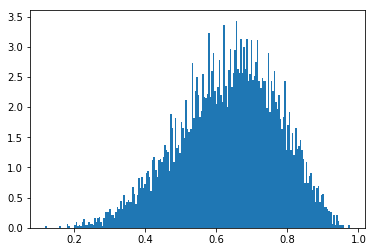

In [16]:
# want to plot density estimate
plt.hist(sample, density=True, bins=200);

Common questions to ask after producing a posterior distribution:
- how much posterior probability lies below some parameter value?
- how much posterior probability lies between two parameter values?
- which parameter value makrs the lower 5% of the posterior probability?
- which range parameter values contains 90% of the posterior probability?
- which parameter value has the highest posterior probability?

these questions can be divided into:
1. intervals of *defined boundaries*
2. questions about intervals of *defined probability mass*
3. questions about *point estimates*

#### 1. defined boundaries

what is the posterior probability that the proportion of water is less than 0.5?

so based on the parameter values we put in p_grid and the posterior values we calculated from binom(6, 9) we sum up all these probabilities.

In [17]:
np.sum(posterior[p_grid < 0.5])

0.17187458902022873

In [18]:
# calculated from sample, this number can change because its a sample
np.sum(sample < 0.5) / 10000

0.175

In [19]:
# how much of posterior probability les between 0.5 and 0.75? 
# what is the prob that water makes up that % of world
np.sum((sample > 0.5) & (sample < 0.75)) / 10000

0.6051

#### 2. intervals of defined mass 

aka confidence interval or credible interval

example: what are the boundaries that contain 80% of posterior

In [64]:
# first 80% percentile
np.quantile(sample, 0.8)

0.7617617617617618

In [21]:
# middle 80% interval
np.quantile(sample, (0.1, 0.9))

array([0.44544545, 0.80990991])

**HDPI** - highest posterior density interval - the narrowest interval containing the specified probability mass. 
-Disadvantages: more computationally intensive, suffers from greater simulation variance (sensitive to how many samples you draw)

**Percentile Intervals (PI)** - more class 10-90 or 25-75% percentile - not as good against asymmetric data...


Are pretty similar but will look different if data is heavily skewed.

Intervals are useful but they just describe a distribution. The prior is the whole distribution.

#### Point Estimates

When describing the posterior distribution, its difficult to produce a "point estimate." Should you use a *maximum a posteriori (MAP)* estimate, mode, mean or median?

Use a loss function. what point estimate would minimize (guess - true).

1. Mean absolute loss d - p (then you want median)
2. Quadratic loss (d - p)**2 (then you want mean)

When the distribution is normal, then mean and median are close.

### Sampling to simulate prediction

sampling from the posterior is also useful to ease *simulation* of the model's implied observations.
1. model checking - is the model behaving after you fit it
2. software validation - check model fitting software with known model
3. research design - evaluate whether research design can be effective (power analysis)
4. forecasting - estimates can be used to simulate new predictions for new cases

Likelihoods work both ways. Given a realized observation, the likelihood functions says how plausible the observatoin is. Given only the parameters, the likelihood defines a distribbution of possible observations that we can sample from, to simulat observation. Bayesian models are therefore *generatve*.

It creates **dummy data** - here it is binomial distribution (tossing the globe).

In [25]:
ss.binom.pmf([0, 1, 2], 2, 0.7)

array([0.09, 0.42, 0.49])

In [55]:
np.random.binomial(n=1, p=0.7, size=2)

array([1, 1])

In [60]:
np.random.binomial(2, p=0.7, size=10)

array([2, 2, 2, 1, 2, 1, 2, 0, 2, 0])

In [63]:
dummy_w = np.random.binomial(2, p=0.7, size=100000)


In [65]:
np.bincount(dummy_w) / 100000

array([0.08987, 0.42226, 0.48787])

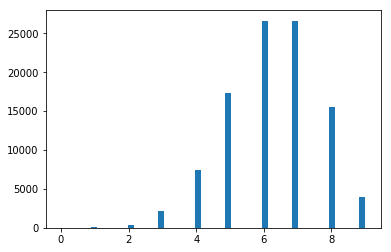

In [67]:
dummy_w = np.random.binomial(9, p=0.7, size=100000)
plt.hist(dummy_w, bins=50);

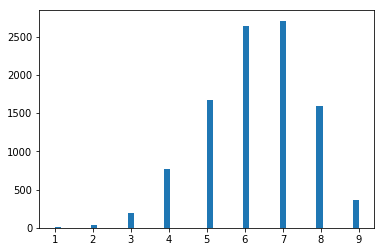

In [71]:
dummy_w = np.random.binomial(9, p=0.7, size=10000)
plt.hist(dummy_w, bins=50);

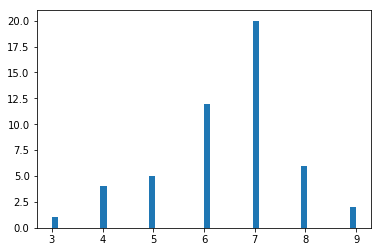

In [73]:
dummy_w = np.random.binomial(9, p=0.7, size=50)
plt.hist(dummy_w, bins=50);

#### Modeling Checking:
a) checking the model fit correctly, b) evaluating the adequacy of a model for some purpose.

A. *retrodictions* how well does the model reproduce the data used to educate it.

B. assess exactly how the model fails to describe the data, as a path toward model comprehension, revision, and improvement